Аналитическая задача -- составить портрет клиента, склонного откликнуться на предложение о новой карте.

## Описание данных

|Комментарий| Признак|
|--:|:--|
|Ипотечный кредит | mortgage|
|Страхование жизни | life_ins|
|Кредитная карта | cre_card|
|Дебетовая карта | deb_card|
|Мобильный банк | mob_bank|
|Текущий счет | curr_acc|
|Интернет-доступ к счету | internet|
|Индивидуальный заем | perloan|
|Наличие сбережений | savings|
|Пользование банкоматом за последнюю неделю | atm_user|
|Пользование услугами онлайн-маркетплейса за последний месяц | markpl|
|Возраст | age |
|Давность клиентской истории | cus_leng |
|Отклик на предложение новой карты | response |

Примечание: 1 -- наличие продукта/услуги/отклика; 0 -- отсутствие продукта/услуги/отклика.  

**Примерный план исследования**

Шаг 1. Загрузка данных;

Шаг 2. Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

Шаг 3. Исследовательский анализ данных
- в разрезе значений целевого признака (`response` -- Отклик на предложение новой карты	) исследовать распределения признаков;
- исследовать возможные зависимости целевого признака от объясняющих признаков;
- в разрезе целевого признака составить портреты клиентов платежной системы;

Шаг 4. Составить и проверить гипотезы о наличие/отсутствии различий по признакам портрета клиента.

Шаг 5. Построить классификационные модели (дополнительное задание).


# Загрузка данных

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr, kendalltau, pointbiserialr
from scipy.stats import (shapiro, kstest,
                         ks_2samp, anderson,
                         jarque_bera,
                         ttest_ind,
                         mannwhitneyu,
                         kruskal)

In [3]:
df = pd.read_csv('/content/vrk_response_bank.csv',  delimiter=";")
df.head(10)


,mortgage,life_ins,cre_card,deb_card,mob_bank,curr_acc,internet,perloan,savings,atm_user,markpl,age,cus_leng,response
0,0,0,0,0,0,0,0,0,0,0,0,18,1,0
1,1,1,0,1,1,0,0,0,0,1,0,18,2,1
2,1,1,0,1,0,0,0,0,0,0,1,18,2,1
3,1,1,1,1,0,1,0,0,0,1,1,18,2,1
4,1,1,0,1,0,0,0,1,0,1,0,18,2,0
5,0,0,0,1,1,1,0,0,0,0,0,18,2,1
6,0,0,0,1,0,0,0,0,0,1,0,18,1,1
7,1,1,0,1,0,0,0,0,0,1,0,18,1,1
8,1,1,0,1,0,0,0,0,0,1,1,18,3,0
9,1,1,1,1,0,1,0,0,0,0,0,18,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30259 entries, 0 to 30258
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   mortgage  30259 non-null  int64
 1   life_ins  30259 non-null  int64
 2   cre_card  30259 non-null  int64
 3   deb_card  30259 non-null  int64
 4   mob_bank  30259 non-null  int64
 5   curr_acc  30259 non-null  int64
 6   internet  30259 non-null  int64
 7   perloan   30259 non-null  int64
 8   savings   30259 non-null  int64
 9   atm_user  30259 non-null  int64
 10  markpl    30259 non-null  int64
 11  age       30259 non-null  int64
 12  cus_leng  30259 non-null  int64
 13  response  30259 non-null  int64
dtypes: int64(14)
memory usage: 3.2 MB


# Первичная обработка данных

In [5]:
#корректировка заголовков

df.rename(columns={'life_ins':'life_insurance',
                   'cre_card':'credit_card',
                   'deb_card':'debit_card',
                   'mob_bank':'mobile_bank',
                   'curr_acc':'current_account',
                   'internet':'internet_access',
                   'perloan':'personal_loan',
                   'atm_user':'atm_use_last_week',
                   'markpl':'marketplace_use_last_month',
                   'cus_leng':'customer_history_length',
                   'response':'new_card_response'}, errors="raise", inplace=True)
df.columns

Index(['mortgage', 'life_insurance', 'credit_card', 'debit_card',
       'mobile_bank', 'current_account', 'internet_access', 'personal_loan',
       'savings', 'atm_use_last_week', 'marketplace_use_last_month', 'age',
       'customer_history_length', 'new_card_response'],
      dtype='object')

In [6]:
df.info()

# пока оставляем типы int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30259 entries, 0 to 30258
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   mortgage                    30259 non-null  int64
 1   life_insurance              30259 non-null  int64
 2   credit_card                 30259 non-null  int64
 3   debit_card                  30259 non-null  int64
 4   mobile_bank                 30259 non-null  int64
 5   current_account             30259 non-null  int64
 6   internet_access             30259 non-null  int64
 7   personal_loan               30259 non-null  int64
 8   savings                     30259 non-null  int64
 9   atm_use_last_week           30259 non-null  int64
 10  marketplace_use_last_month  30259 non-null  int64
 11  age                         30259 non-null  int64
 12  customer_history_length     30259 non-null  int64
 13  new_card_response           30259 non-null  int64
dtypes: int

In [7]:
df.describe()

#информативен только возраст

,mortgage,life_insurance,credit_card,debit_card,mobile_bank,current_account,internet_access,personal_loan,savings,atm_use_last_week,marketplace_use_last_month,age,customer_history_length,new_card_response
count,30259.000000,30259.000000,30259.000000,30259.000000,30259.000000,30259.000000,30259.000000,30259.000000,30259.000000,30259.000000,30259.000000,30259.000000,30259.000000,30259.000000
mean,0.741102,0.905384,0.679963,0.618361,0.122079,0.806471,0.210483,0.146535,0.288575,0.606266,0.687762,43.433623,2.115899,0.432566
std,0.438037,0.292689,0.466498,0.485797,0.327383,0.395071,0.407658,0.353648,0.453107,0.488585,0.463414,10.939400,0.698301,0.495440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,43.000000,2.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,52.000000,3.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,63.000000,3.000000,1.000000


In [8]:
# проверить наличие дублирующихся записей
#работа с дублями
print(f'В наборе данных имеется {df.duplicated().sum()} дублей.')
df.loc[df.duplicated()]

В наборе данных имеется 16223 дублей.


,mortgage,life_insurance,credit_card,debit_card,mobile_bank,current_account,internet_access,personal_loan,savings,atm_use_last_week,marketplace_use_last_month,age,customer_history_length,new_card_response
10,1,1,0,1,0,0,0,0,0,1,0,18,1,1
19,1,1,0,1,0,1,0,0,0,0,1,18,2,1
25,1,1,0,0,0,0,0,0,0,1,1,18,2,0
29,1,1,0,1,1,1,0,0,0,1,0,18,1,1
31,1,1,0,1,0,0,0,0,0,1,0,18,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30252,1,1,1,1,0,1,1,0,0,1,1,63,3,0
30254,1,1,1,1,0,1,1,0,1,1,1,63,3,0
30256,1,1,1,1,0,1,0,0,1,1,1,63,3,0
30257,1,1,1,0,0,1,1,0,1,1,1,63,3,0


In [9]:
# сложно идентифицировать найденные дубли как дубли, нет идентификатора, это вполне может быть совпадение признаков у разных клиентов, пока не трогаем

In [10]:
#проверить наличие аномальных значений
#посмотрим на уникальные значения каждого признака
for col in df.columns:
    print(f'--признак {col}--')
    print(df[col].value_counts())
    print(f'----'*10)


--признак mortgage--
mortgage
1    22425
0     7834
Name: count, dtype: int64
----------------------------------------
--признак life_insurance--
life_insurance
1    27396
0     2863
Name: count, dtype: int64
----------------------------------------
--признак credit_card--
credit_card
1    20575
0     9684
Name: count, dtype: int64
----------------------------------------
--признак debit_card--
debit_card
1    18711
0    11548
Name: count, dtype: int64
----------------------------------------
--признак mobile_bank--
mobile_bank
0    26565
1     3694
Name: count, dtype: int64
----------------------------------------
--признак current_account--
current_account
1    24403
0     5856
Name: count, dtype: int64
----------------------------------------
--признак internet_access--
internet_access
0    23890
1     6369
Name: count, dtype: int64
----------------------------------------
--признак personal_loan--
personal_loan
0    25825
1     4434
Name: count, dtype: int64
-----------------------

In [11]:
# все данные кажутся адекватными
# пропущенных значений также нет 30259 non-null

In [12]:
# все признаки номинальные, принимающие значения (0, 1), только возраст можно отнести к категориальным, для него посмотрим перцинтили

df.age.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])


,age
count,30259.000000
mean,43.433623
std,10.939400
min,18.000000
1%,20.000000
5%,27.000000
25%,34.000000
50%,43.000000
75%,52.000000
95%,61.000000


In [13]:
# строим "ящик с усами"
def calc_boxplot(df_col : pd.Series) -> tuple:
    """
    Функция для расчета значений нижнего и верхнего усов.
    На вход подается столбец датафрейма,
    на выходе кортеж: первый элемент -- нижний ус, второй элемент -- верхний ус
    """
    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df_col.dropna()) <= hival, np.asarray(df_col.dropna()))
    wisklo = np.compress(np.asarray(df_col.dropna()) >= loval, np.asarray(df_col.dropna()))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival #(нижний ус, верхний ус)

<ipython-input-14-1c47e44963aa>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 1)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


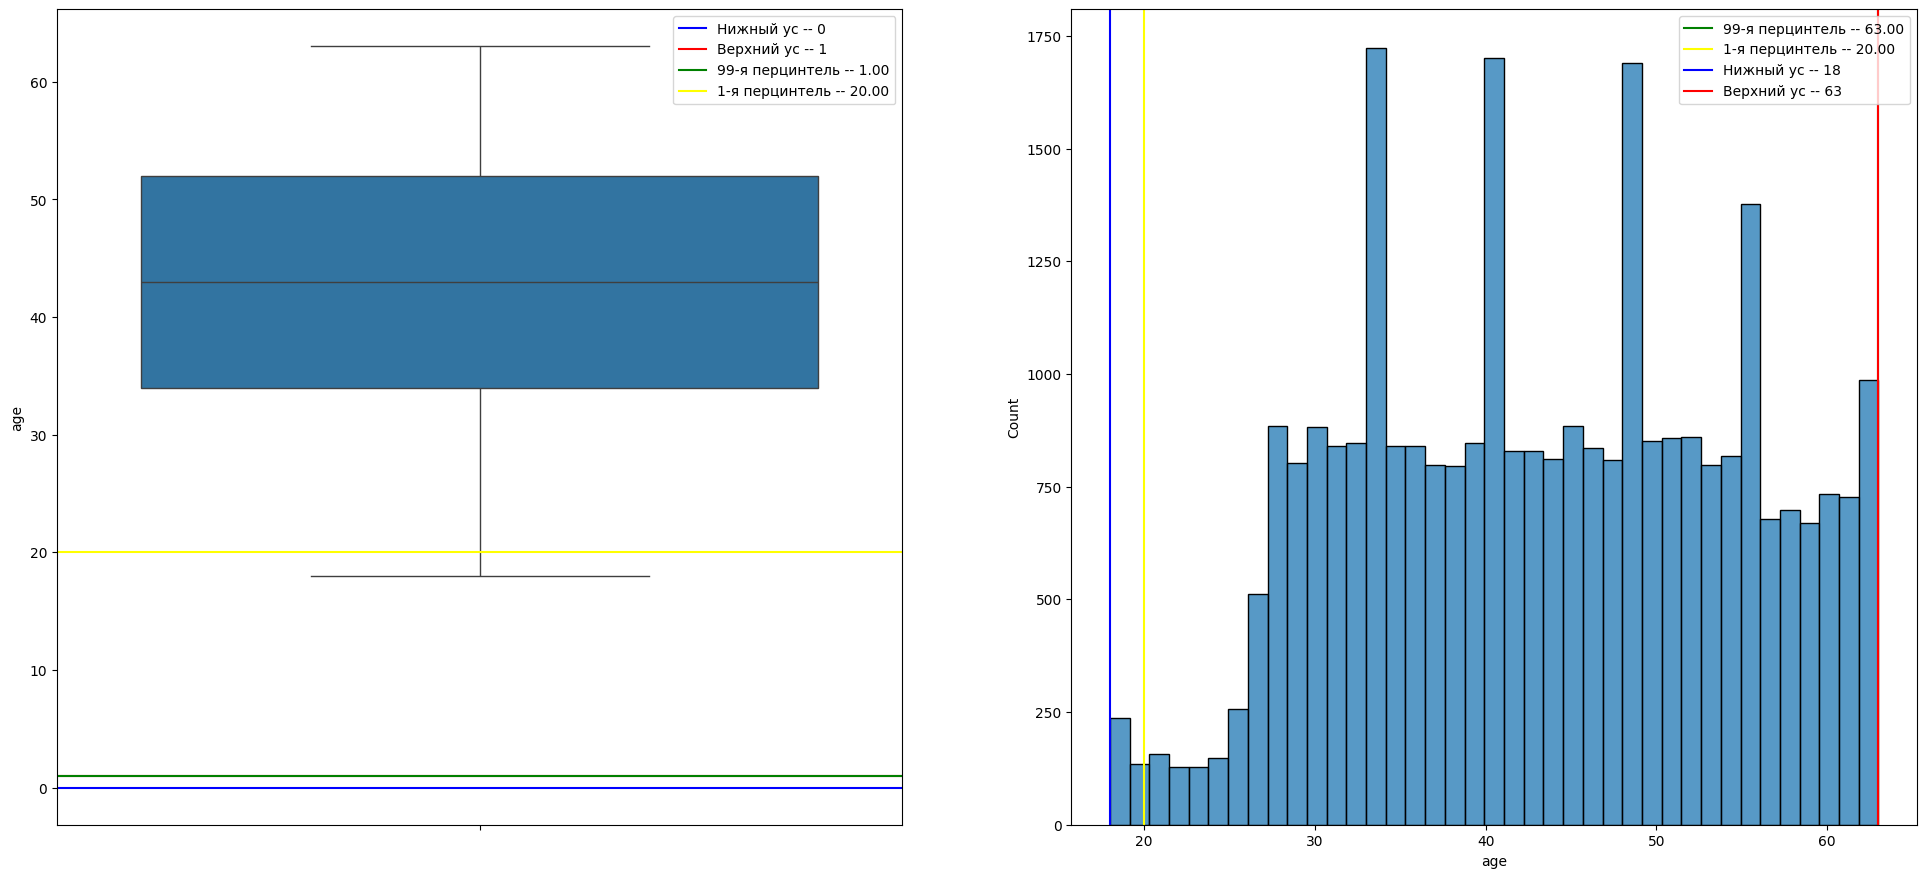

In [14]:
plt.subplots(1, figsize=(24, 36))
plt.subplot(3, 2, 1)
ax = sns.boxplot(data=df,
                 y='age')
actual_loval, actual_hival = calc_boxplot(df[col])
ax.axhline(actual_loval,
               color='blue',
               label=f'Нижный ус -- {actual_loval}')
ax.axhline(actual_hival, color='red',
               label=f'Верхний ус -- {actual_hival}')
q_99 = np.percentile(df[col].dropna(), 99)
ax.axhline(q_99,
               color='green',
               label=f'99-я перцинтель -- {q_99:.2f}')
q_1 = np.percentile(df.age.dropna(), 1)
ax.axhline(q_1, color='yellow',
               label=f'1-я перцинтель -- {q_1:.2f}')
plt.legend()
plt.subplot(3, 2, 2)
ax = sns.histplot(df.age);
q_99 = np.percentile(df.age.dropna(), 99)
ax.axvline(q_99,
            color='green',
            label=f'99-я перцинтель -- {q_99:.2f}')
q_1 = np.percentile(df.age.dropna(), 1)
ax.axvline(q_1,
            color='yellow',
            label=f'1-я перцинтель -- {q_1:.2f}')
actual_loval, actual_hival = calc_boxplot(df.age)
ax.axvline(actual_loval,
               color='blue',
               label=f'Нижный ус -- {actual_loval}')
ax.axvline(actual_hival, color='red',
               label=f'Верхний ус -- {actual_hival}')
plt.legend()

In [15]:
# По ящику и усами аномалий нет, оставляем все как есть

In [16]:
print(f'''--средние--
{df.age.agg(['min', 'max', 'mean', 'median'])}
''')
print(f'''--мода--
{df.age.mode()}
''')


--средние--
min       18.000000
max       63.000000
mean      43.433623
median    43.000000
Name: age, dtype: float64

--мода--
0    28
1    45
Name: age, dtype: int64



чаще всего встречаются люди 28 и 45 лет

# Исследовательский анализ данных

В разрезе значений целевого признака new_card_response исследуем распределения признаков

In [17]:
#категориальные признаки
lst_disc = ['mortgage', 'life_insurance', 'credit_card', 'debit_card',
       'mobile_bank', 'current_account', 'internet_access', 'personal_loan',
       'savings', 'atm_use_last_week', 'marketplace_use_last_month', 'age',
       'customer_history_length', 'new_card_response']

In [18]:
df.columns

Index(['mortgage', 'life_insurance', 'credit_card', 'debit_card',
       'mobile_bank', 'current_account', 'internet_access', 'personal_loan',
       'savings', 'atm_use_last_week', 'marketplace_use_last_month', 'age',
       'customer_history_length', 'new_card_response'],
      dtype='object')

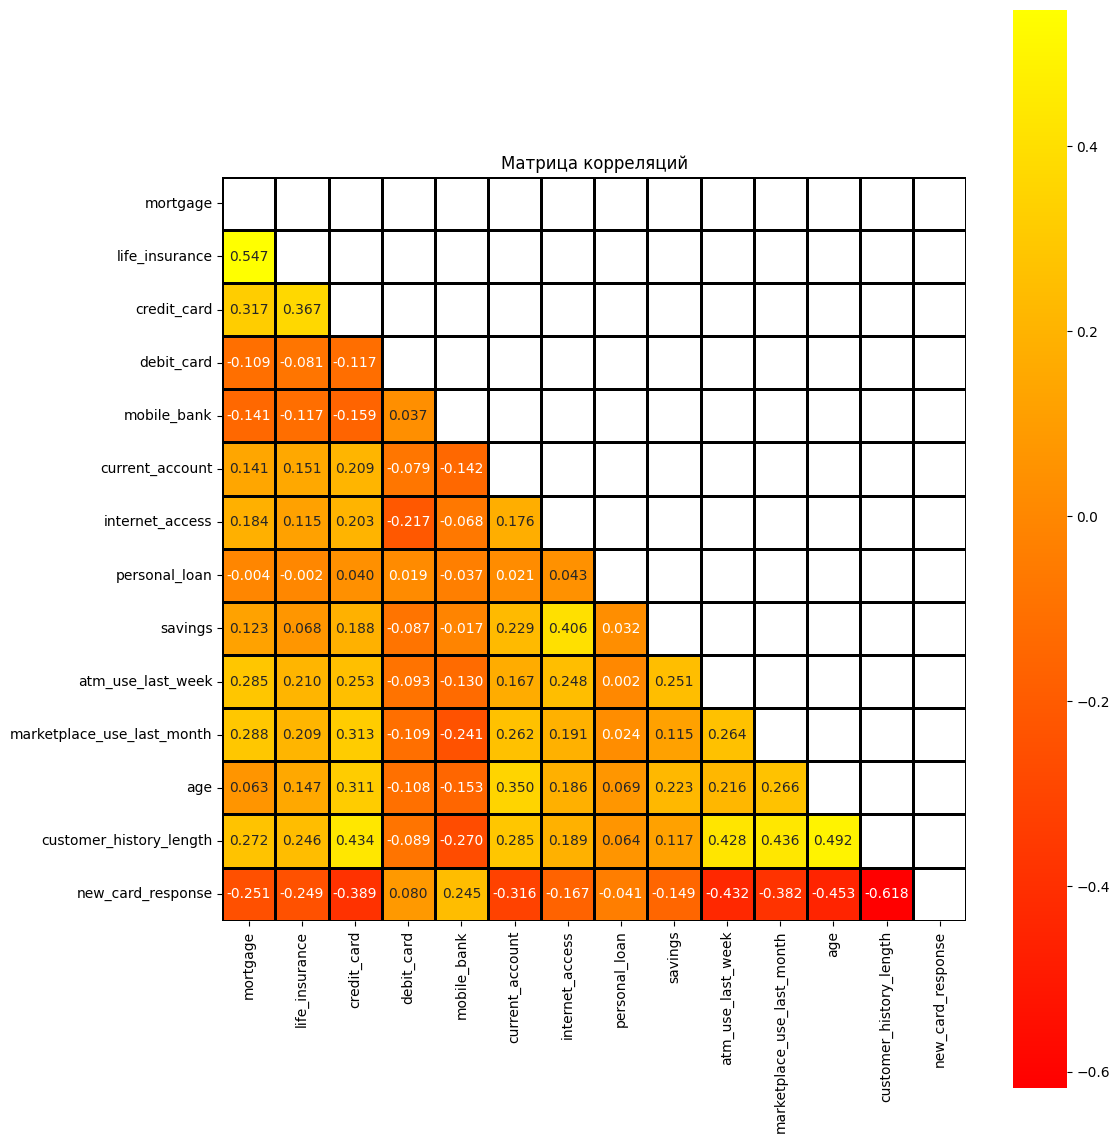

In [19]:
#построим матрицу корреляций, чтобы определить явные зависимости

fig, ax = plt.subplots(figsize=(12,14))
ax = sns.heatmap(data = df.corr(),
                 annot=True,
                 square=True,
                 cmap='autumn',
                 fmt='.3f',
                 linewidths=1,
                 linecolor='black',
                 mask=np.triu(df.corr(method='kendall')))
plt.title('Матрица корреляций')
plt.show()

Из этой матрицы видно что с целевым признаком большую корреляцию имеют:
* mortgage
* life_insurance
* credit_card
* mobile_bank
* current_account
* atm_use_last_week'
* age
* marketplace_use_last_month
* customer_history_length


In [20]:
# для тех, кто откликнулся на новую карту посмотрим какие  другие признаки
lst_selected=['mortgage', 'life_insurance', 'credit_card',
       'mobile_bank', 'current_account',
       'atm_use_last_week', 'marketplace_use_last_month',
       'customer_history_length']

# for col in lst_selected:
#     print(f'--признак {col}--')
#     print(df[df['new_card_response']==1][col].value_counts() )
#     print(df[df['new_card_response']==0][col].value_counts() )
#     print(f'----'*10)
print(f'--признак customer_history_length --')
print(df.groupby('new_card_response')['customer_history_length'].value_counts())
print(df.groupby('new_card_response')['customer_history_length'].agg(pd.Series.mode))

print(f'--признак age --')
print(df.groupby('new_card_response')['age'].agg(['mean','median']))
print(df.groupby('new_card_response')['age'].agg(pd.Series.mode))

--признак customer_history_length --
new_card_response  customer_history_length
0                  3                          9083
                   2                          7459
                   1                           628
1                  2                          7639
                   1                          5199
                   3                           251
Name: count, dtype: int64
new_card_response
0    3
1    2
Name: customer_history_length, dtype: int64
--признак age --
                        mean  median
new_card_response                   
0                  47.760745    49.0
1                  37.757354    37.0
new_card_response
0    60
1    28
Name: age, dtype: int64


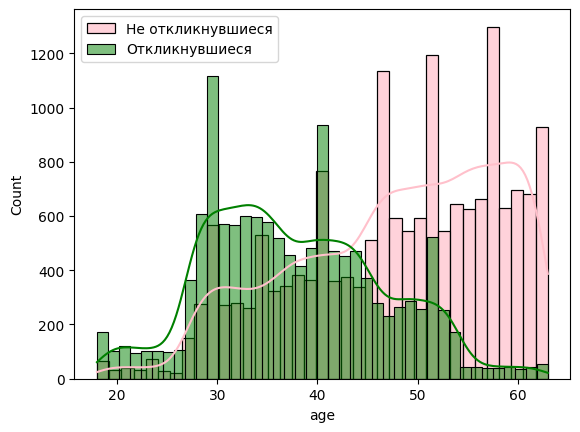

In [21]:
# построим для признака возраст графики плотностей в разрезе целевого признака
sns.histplot(df[df['new_card_response'] == 0]['age'],
             color='pink',
             label='Не откликнувшиеся',
             alpha = 0.7,
             kde = True);
sns.histplot(df[df['new_card_response'] == 1]['age'],
             color='green',
             label='Откликнувшиеся',
             alpha = 0.5,
              kde = True);
plt.legend()

In [22]:
# Создадим новый дата фрейм по бинарным признакам, в котором посмотрим процент клиентов откликнувшихся и нет с наличием и без этого признака

df_new=pd.DataFrame(data=None, index=['all', 'response', 'no_response'],
                    columns=['total', 'total_pers' ])

lst_selected=['mortgage', 'life_insurance', 'credit_card',
       'mobile_bank', 'current_account',
       'atm_use_last_week', 'marketplace_use_last_month']

df_new.loc['all','total']=df.age.count()
df_new.loc['response','total']=df[df.new_card_response==1].age.count()
df_new.loc['no_response','total']=df[df.new_card_response==0].age.count()
df_new.loc['all','total_pers']=100
df_new.loc['response','total_pers']=round(df_new.loc['response','total']/df.age.count()*100,2)
df_new.loc['no_response','total_pers']=round(df_new.loc['no_response','total']/df.age.count()*100,2)

for col in lst_selected:
    df_new.loc['all', col]=round(df[(df[col]==1)].age.count()/df_new.loc['all','total']*100,2)
    df_new.loc['response', col]=round(df[(df[col]==1)&(df.new_card_response==1)].age.count()/df_new.loc['response','total']*100,2)
    df_new.loc['no_response', col]=round(df[(df[col]==1)&(df.new_card_response==0)].age.count()/df_new.loc['no_response','total']*100,2)

    df_new.loc['all','no_'+col]=round(df[(df[col]==0)].age.count()/df_new.loc['all','total']*100,2)
    df_new.loc['response','no_'+col]=round(df[(df[col]==0)&(df.new_card_response==1)].age.count()/df_new.loc['response','total']*100,2)
    df_new.loc['no_response','no_'+col]=round(df[(df[col]==0)&(df.new_card_response==0)].age.count()/df_new.loc['no_response','total']*100,2)

df_new


,total,total_pers,mortgage,no_mortgage,life_insurance,no_life_insurance,credit_card,no_credit_card,mobile_bank,no_mobile_bank,current_account,no_current_account,atm_use_last_week,no_atm_use_last_week,marketplace_use_last_month,no_marketplace_use_last_month
all,30259,100,74.11,25.89,90.54,9.46,68.00,32.00,12.21,87.79,80.65,19.35,60.63,39.37,68.78,31.22
response,13089,43.26,61.53,38.47,82.20,17.80,47.21,52.79,21.39,78.61,66.34,33.66,36.43,63.57,48.51,51.49
no_response,17170,56.74,83.70,16.30,96.90,3.10,83.84,16.16,5.21,94.79,91.56,8.44,79.07,20.93,84.22,15.78


In [23]:
lst_selected=['mortgage', 'life_insurance', 'credit_card',
       'mobile_bank', 'current_account',
       'atm_use_last_week', 'marketplace_use_last_month']

df_new2=pd.DataFrame(data=None, index=['all', 'response', 'no_response'],
                    columns=['total', 'total_pers' ])
df_new2.loc['all','total']=df.age.count()
df_new2.loc['response','total']=df[df.new_card_response==1].age.count()
df_new2.loc['no_response','total']=df[df.new_card_response==0].age.count()
df_new2.loc['all','total_pers']=100
df_new2.loc['response','total_pers']=round(df_new2.loc['response','total']/df.age.count()*100,2)
df_new2.loc['no_response','total_pers']=round(df_new2.loc['no_response','total']/df.age.count()*100,2)

for col in lst_selected:
    df_new2.loc['all', col]=df[(df[col]==1)].age.count()
    df_new2.loc['response', col]=round(df[(df[col]==1)&(df.new_card_response==1)].age.count()/df_new2.loc['all', col]*100,2)
    df_new2.loc['no_response', col]=round(df[(df[col]==1)&(df.new_card_response==0)].age.count()/df_new2.loc['all', col]*100,2)

    df_new2.loc['all','no_'+col]=df[(df[col]==0)].age.count()
    df_new2.loc['response','no_'+col]=round(df[(df[col]==0)&(df.new_card_response==1)].age.count()/df_new2.loc['all','no_'+col]*100,2)
    df_new2.loc['no_response','no_'+col]=round(df[(df[col]==0)&(df.new_card_response==0)].age.count()/df_new2.loc['all','no_'+col]*100,2)

df_new2

,total,total_pers,mortgage,no_mortgage,life_insurance,no_life_insurance,credit_card,no_credit_card,mobile_bank,no_mobile_bank,current_account,no_current_account,atm_use_last_week,no_atm_use_last_week,marketplace_use_last_month,no_marketplace_use_last_month
all,30259,100,22425.00,7834.00,27396.00,2863.00,20575.00,9684.00,3694.0,26565.00,24403.00,5856.00,18345.00,11914.00,20811.00,9448.00
response,13089,43.26,35.92,64.27,39.27,81.38,30.03,71.35,75.8,38.73,35.58,75.24,25.99,69.84,30.51,71.33
no_response,17170,56.74,64.08,35.73,60.73,18.62,69.97,28.65,24.2,61.27,64.42,24.76,74.01,30.16,69.49,28.67


Отсюда видно, например, что неоткликнувшихся на новую карту клиентов с ипотекой  83.7% , в то время как среди откликнувшихся таких всего 61,53%.
А общее соотношение ипотечных клиентов к безипотечным  74.11% к 25.89%


## Выводы:

Чаще готовы принять предложение банка клиенты, у которых:

* нет ипотеки
* **нет страховки жизни** >80%
* **нет кредитной карты** >70%
* **есть мобильный банкинг**  75%
* **нет текущего счета** 75%
* не пользовался банкоматом за посл неделю
* не пользовался маркетплейсом
* **имеет срок работы с банком - 1**
* **возраст до 43**

Чаще НЕ готовы принять предложение банка клиенты, у которых:

* есть ипотека
* есть страховки жизни
* есть кредитка
* нет мобильного банкинга
* есть текущий счет
* **пользовался банкоматом за посл неделю** 74%
* пользовался маркетплейсом
* **имеет срок работы с банком - 3**
* **возраст после 43**


Дебетовая карта, персональный заем, доступ к интернету и сбережения не особо влияют на принятие решения


# Составить и проверить гипотезы о наличие/отсутствии различий по признакам портрета клиента.

Проверяем гипотезу относительно влияния возраста.

In [24]:
#вначале проверяем гипотезу о нормальности исследуемых случ величин для единственного непрерывного признака age
# H_0: расспределение случайных величин не отличаются он нормального
# H_1 распред случайных  величин отличны от нормального


#Применяем критерий Колмагорова-Смирнова
#примем уровень значимости alpha = 0.05
print(f'''
{ks_2samp(df[df.new_card_response == 1].age, df[df.new_card_response == 0].age)}

#Применяем критерий Шапиро
{shapiro(df[df.new_card_response == 1].age)}
{shapiro(df[df.new_card_response == 0].age)}

Вывод: т.к. pvalue=0 < alpha = 0.05, то гипотезу H_0 отвергаем,
 т.е. распределение не нормальное.
      ''')

# H_0: возраст откликнувшихся равен возрасту не откликнувшихся
# H_1 возраст откликнувшихся не равен возрасту не откликнувшихся
# применим критерий Манна-Уитни - гипотеза о равенстве выборочных средних или медиан

print(f'''
{mannwhitneyu(df[df.new_card_response == 0].age, df[df.new_card_response == 1].age)}
      ''')

print(f'''
{df.groupby('new_card_response').age.agg(['mean', 'median'])}
''')


KstestResult(statistic=0.4282801276312124, pvalue=0.0, statistic_location=44, statistic_sign=1)

#Применяем критерий Шапиро
ShapiroResult(statistic=0.9863177972839171, pvalue=1.7367361334650174e-33)
ShapiroResult(statistic=0.9522252053996283, pvalue=1.380514067076486e-58)

Вывод: т.к. pvalue=0 < alpha = 0.05, то гипотезу H_0 отвергаем,
 т.е. распределение не нормальное.
      

MannwhitneyuResult(statistic=171980182.5, pvalue=0.0)
      

                        mean  median
new_card_response                   
0                  47.760745    49.0
1                  37.757354    37.0



/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13089.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17170.
  res = hypotest_fun_out(*samples, **kwds)


Вывод: т.к. pvalue=0 < alpha = 0.05, то гипотезу H_0 отвергаем,
 т.е. возраст откликнувшихся не равен возрасту не откликнувшихся на новое предложение банка. Согласно средним возраст откликнувшихся меньше возраста не откликнувшихся

In [25]:
#Гипотезы категориальных признаков:

# Н_0: разница в отклике между клиентами c доступом интернета и без доступа статистически не значима т.е. клиенты c доступом интернета к счету и без него откликаются одинаково
# Н_1: имеется статистически значимая разница в отклике клиентов c доступом интернета и без него

# В данном случае признак категориальный, значит используем z-критерий.


In [26]:
import scipy.stats as st
import math
# Проверим гипотезу подставляя признаки в формулу z-

n1 = df[df.internet_access ==0]['new_card_response'].count()
n2 = df[df.internet_access ==1]['new_card_response'].count()
m1 = df[(df.new_card_response== 1) & (df.internet_access ==0)]['new_card_response'].count()
m2 = df[(df.new_card_response== 1) & (df.internet_access ==1)]['new_card_response'].count()
print(n1, m1, n2, m2)

alpha = 0.05

z_value = (m1/n1 - m2/n2) / math.sqrt(((m1+m2)/(n1+n2))*(1-((m1+m2)/(n1+n2)))*(1/n1+1/n2))

z_value

distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print(n1, m1, n2, m2, z_value, p_value)
if p_value < alpha:
        print(f"""Отвергаем нулевую гипотезу: разница в долях
по событию <<{'new_card_response'}>> статистически значима.""")
else:
    print(f"""Не получилось отвергнуть нулевую гипотезу: разница в долях по событию <<{'new_card_response'}>> статистически незначима.""")

23890 11353 6369 1736
23890 11353 6369 1736 29.005351272774497 0.0
Отвергаем нулевую гипотезу: разница в долях
по событию <<new_card_response>> статистически значима.


In [27]:
df.columns

Index(['mortgage', 'life_insurance', 'credit_card', 'debit_card',
       'mobile_bank', 'current_account', 'internet_access', 'personal_loan',
       'savings', 'atm_use_last_week', 'marketplace_use_last_month', 'age',
       'customer_history_length', 'new_card_response'],
      dtype='object')

In [28]:
lst_selected=['mortgage', 'life_insurance', 'credit_card', 'debit_card',
       'mobile_bank', 'current_account', 'internet_access', 'personal_loan',
       'savings', 'atm_use_last_week', 'marketplace_use_last_month']
def test_z_criterion(event_name, goal_event, alpha):
    import scipy.stats as st
    import math

    n1 = df[df[event_name] ==0][goal_event].count()
    n2 = df[df[event_name] ==1][goal_event].count()
    m1 = df[(df[goal_event]== 1) & (df[event_name] ==0)][goal_event].count()
    m2 = df[(df[goal_event]== 1) & (df[event_name] ==1)][goal_event].count()
    z_value = (m1/n1 - m2/n2) / math.sqrt(((m1+m2)/(n1+n2))*(1-((m1+m2)/(n1+n2)))*(1/n1+1/n2))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2 #1-F(t)
    print(n1, m1, n2, m2, z_value, p_value )
    print('Результаты проверки гипотезы H_0 по z-критерию:')
    print('Уровень значимости alpha={:.2f}'.format(alpha))
    print('P-value: {:.2f}'.format(p_value))
    if p_value < alpha:
        print(f"""Отвергаем нулевую гипотезу: разница в долях
по событию <<{event_name}>> статистически значима.""")
    else: print(f"""Не получилось отвергнуть нулевую гипотезу: разница в долях по
событию <<{event_name}>> статистически незначима.""")
    print('------------------------------------------------------------')

In [29]:
for col in lst_selected:
    test_z_criterion(col, 'new_card_response', 0.05)

7834 5035 22425 8054 43.61035538630553 0.0
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по событию <<mortgage>> статистически значима.
------------------------------------------------------------
2863 2330 27396 10759 43.27517114396227 0.0
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по событию <<life_insurance>> статистически значима.
------------------------------------------------------------
9684 6910 20575 6179 67.68312079800415 0.0
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по событию <<credit_card>> статистически значима.
------------------------------------------------------------
11548 4411 18711 8678 -13.955732861906544 0.0
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-val

## Выводы после гипотез по портрету клиента:
Разница в долях откликнувшихся клиентов в зависимости от наличия или отсутствия того или иного признака статистически значима для всех признаков.

Клиенты по разному откликаются на предложение банка в зависимости от наличия или отсутствия того или иного фактора, что мы увидели в ходе анализа и проверки гипотезы.

# Построить классификационные модели (дополнительное задание)

В нашем дата сете все признаки кроме возраста категориальные

cus_lend имеет значения 1,2,3 поэтом переведем этот признак  в 1 и 0 для удобства

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

#загрузка классификаторов
from sklearn.tree import DecisionTreeClassifier, plot_tree # дерево решений
from sklearn.ensemble import RandomForestClassifier #случайный лес
from sklearn.linear_model import LogisticRegression # логистическая регресси
from sklearn.svm import SVC # метод опорных векторов
from sklearn.linear_model import SGDClassifier # стохастический градиентный спуск

#метрики
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [31]:
df_encoder = pd.get_dummies(df, columns = ['customer_history_length'], dtype = float)
df_encoder

,mortgage,life_insurance,credit_card,debit_card,mobile_bank,current_account,internet_access,personal_loan,savings,atm_use_last_week,marketplace_use_last_month,age,new_card_response,customer_history_length_1,customer_history_length_2,customer_history_length_3
0,0,0,0,0,0,0,0,0,0,0,0,18,0,1.0,0.0,0.0
1,1,1,0,1,1,0,0,0,0,1,0,18,1,0.0,1.0,0.0
2,1,1,0,1,0,0,0,0,0,0,1,18,1,0.0,1.0,0.0
3,1,1,1,1,0,1,0,0,0,1,1,18,1,0.0,1.0,0.0
4,1,1,0,1,0,0,0,1,0,1,0,18,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30254,1,1,1,1,0,1,1,0,1,1,1,63,0,0.0,0.0,1.0
30255,0,1,1,0,0,0,0,0,0,0,0,63,1,0.0,1.0,0.0
30256,1,1,1,1,0,1,0,0,1,1,1,63,0,0.0,0.0,1.0
30257,1,1,1,0,0,1,1,0,1,1,1,63,0,0.0,0.0,1.0


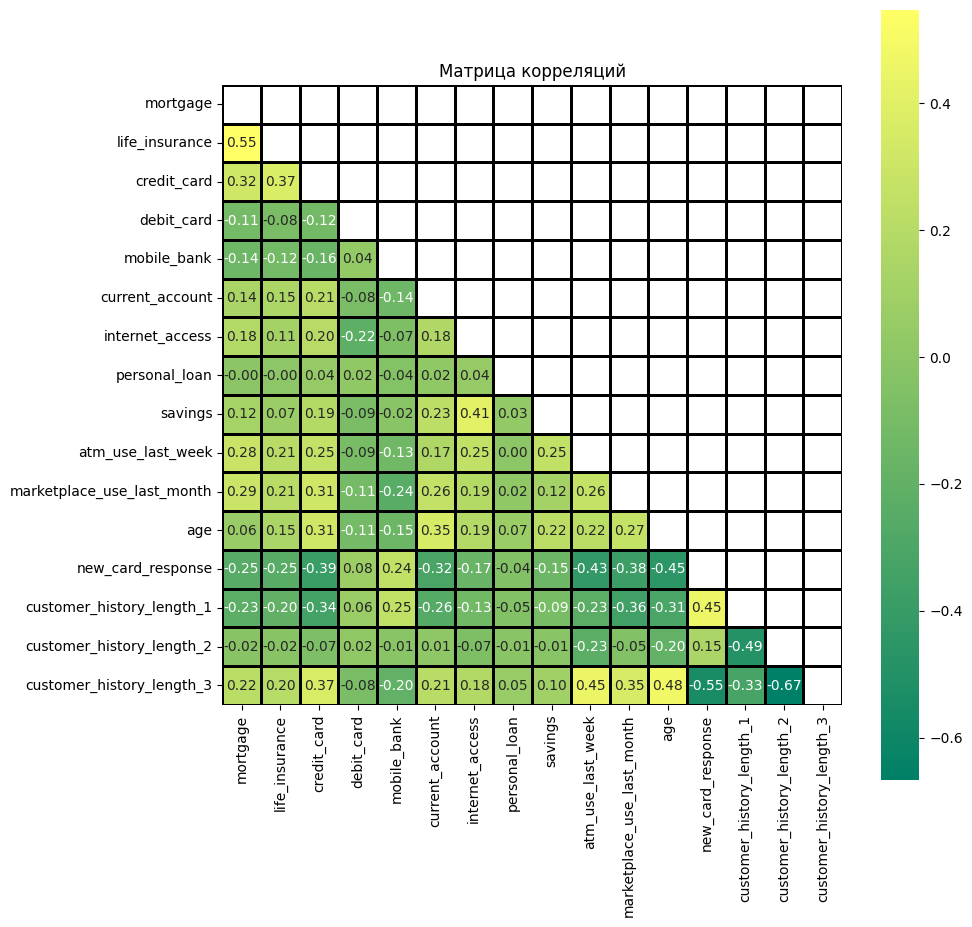

In [32]:
# еще раз построим матрицу корреляций
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(data=df_encoder.corr(),annot=True,
                 square=True, cmap='summer', fmt='.2f',
                 linewidths= 1, linecolor='black',
                mask=np.triu(df_encoder.corr()))
plt.title('Матрица корреляций')
plt.show()

In [33]:
df_encoder.columns

Index(['mortgage', 'life_insurance', 'credit_card', 'debit_card',
       'mobile_bank', 'current_account', 'internet_access', 'personal_loan',
       'savings', 'atm_use_last_week', 'marketplace_use_last_month', 'age',
       'new_card_response', 'customer_history_length_1',
       'customer_history_length_2', 'customer_history_length_3'],
      dtype='object')

In [34]:
#выберем признаки которые максимально коррелируют с new_card_response , исключим все с коэффициентом меньше 0.2
# эти 3 мультиколинеарны 'customer_history_length_1', 'customer_history_length_2', 'customer_history_length_3',
# поэтому среди них оставим те, которые с  высоким коэффициентом это 'customer_history_length_1',  'customer_history_length_3'
selected_columns=['mortgage', 'life_insurance', 'credit_card',
       'mobile_bank', 'current_account',
       'atm_use_last_week', 'marketplace_use_last_month', 'age',
        'customer_history_length_1', 'customer_history_length_3']


In [35]:
#делим на целевую и независимые переменные
y = df_encoder.new_card_response
x = df_encoder[selected_columns]

In [36]:
#разделяем данные на обучающую и тестовую выборки в соотношении 70/30
X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                    test_size= 0.3,
                                                    random_state=0)

In [37]:
#Нормализация обучающего и тестового множеств независимых переменных при помощи MinMaxScaler()

st_scaler = MinMaxScaler()
st_scaler.fit(X_train)

MinMaxScaler()

In [38]:
X_train_st = st_scaler.transform(X_train)
X_test_st = st_scaler.transform(X_test)

In [39]:
#посмотрим на значения после масштабирования
pd.DataFrame(X_train_st)


,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.355556,1.0,0.0
1,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.911111,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.488889,0.0,1.0
3,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.288889,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.911111,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
21176,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.511111,0.0,0.0
21177,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.688889,0.0,0.0
21178,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.422222,0.0,0.0
21179,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.0


In [40]:
print("""размер обучающего множества {}
размер тестового множества {}""".format(X_train_st.shape[0], X_test_st.shape[0]))

размер обучающего множества 21181
размер тестового множества 9078


Теперь можем приступать к построению модели **ДЕРЕВО РЕШЕНИЙ**

In [41]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_st, y_train)

DecisionTreeClassifier(random_state=0)

In [42]:
#предсказываем результат для тестового множества

y_predict_clf= clf.predict(X_test_st)


In [43]:
print(classification_report(y_test, y_predict_clf))
#F1-score это доля удачно распознанных ответов
#0.83 и 0,75 это больше 6,  модель хорошо обучилась


              precision    recall  f1-score   support

           0       0.80      0.86      0.83      5152
           1       0.79      0.71      0.75      3926

    accuracy                           0.79      9078
   macro avg       0.79      0.78      0.79      9078
weighted avg       0.79      0.79      0.79      9078



In [44]:

pd.DataFrame(confusion_matrix(y_test, y_predict_clf),
             columns = ['прогноз для класса 0','прогноз для класса 1'],
             index = ['истинный класс 0','истинный класс 1'])

,прогноз для класса 0,прогноз для класса 1
истинный класс 0,4414,738
истинный класс 1,1129,2797


**Вывод:**
 Из полученного отчёта мы видим, что класс 0 распознался хорошо (0,83), класс 1 распознаётся чуть хуже (0,75), но все равно доля правильного распознования высокая.

Для сравнения построим другую модель - **ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ**

In [45]:
lr = LogisticRegression(random_state=0)

In [46]:
lr.fit(X_train_st, y_train)

LogisticRegression(random_state=0)

In [47]:
y_pred_lr = lr.predict(X_test_st)


In [48]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      5152
           1       0.78      0.80      0.79      3926

    accuracy                           0.82      9078
   macro avg       0.82      0.82      0.82      9078
weighted avg       0.82      0.82      0.82      9078



По результатам видим, что логистическая регрессия показала результат еще лучше. Попробуем еще улучшить используя сетку решений для поиска оптимального набора параметров.

In [49]:
# В данном случае мы стрим сетку для логистической регрессии и перебираем параметры C и penalty.

grid_search = GridSearchCV(LogisticRegression(max_iter=3000, random_state=0, solver='saga'),
                          param_grid={
                              'C':[ 0.01, 0.05, 0.1, 0.5, 1, 10, 50, 100],
                              'penalty' : ['l1','l2']
                          },
                          cv=5,
                          scoring='recall')

grid_search.fit(X_train_st, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=3000, random_state=0,
                                          solver='saga'),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 10, 50, 100],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [50]:
#выводим лучшие параметры
grid_search.best_params_

{'C': 0.01, 'penalty': 'l1'}

In [51]:
# Строим модель с учётом лучших параметров и результат не изменился.

lr = LogisticRegression(penalty='l1', C=0.01, random_state=0, solver='saga')
lr.fit(X_train_st, y_train)
y_pred_lr = lr.predict(X_test_st)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      5152
           1       0.78      0.80      0.79      3926

    accuracy                           0.82      9078
   macro avg       0.81      0.82      0.81      9078
weighted avg       0.82      0.82      0.82      9078



In [52]:
pd.DataFrame(confusion_matrix(y_test, y_pred_lr),
             columns = ['прогноз для класса 0','прогноз для класса 1'],
             index = ['истинный класс 0','истинный класс 1'])

,прогноз для класса 0,прогноз для класса 1
истинный класс 0,4265,887
истинный класс 1,774,3152


Тем не менее,  согласно f1-score и матрице ошибок модель в результате получилась хорошая.

Построим еще одну модель - **RANDOM FOREST**

In [53]:
rnd = RandomForestClassifier(random_state=0)
rnd.fit(X_train_st, y_train)
y_pred_rnd = rnd.predict(X_test_st)
print(classification_report(y_test, y_pred_rnd))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      5152
           1       0.79      0.75      0.77      3926

    accuracy                           0.80      9078
   macro avg       0.80      0.80      0.80      9078
weighted avg       0.80      0.80      0.80      9078



Результат чуть хуже, чем у логистической регрессии, попробуем подобрать параметры оптимальнее.

In [54]:
grid_search = GridSearchCV(
RandomForestClassifier(),
param_grid={'n_estimators':[1,10,50,100,150,200],
           'max_depth':[1,2,3,4,5]},
cv=5,
scoring='recall')

grid_search.fit(X_train_st, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [1, 10, 50, 100, 150, 200]},
             scoring='recall')

In [55]:
grid_search.best_params_

{'max_depth': 3, 'n_estimators': 50}

In [56]:
#С учётом измения параметров модель стала хуже распознавать оба класса (0.79 и 0.74)

rnd = RandomForestClassifier(random_state=0, n_estimators = 1, max_depth=2)
rnd.fit(X_train_st, y_train)
y_pred_rnd = rnd.predict(X_test_st)
print(classification_report(y_test, y_pred_rnd))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      5152
           1       0.72      0.76      0.74      3926

    accuracy                           0.77      9078
   macro avg       0.76      0.76      0.76      9078
weighted avg       0.77      0.77      0.77      9078



In [57]:
#матрица ошибок
pd.DataFrame(confusion_matrix(y_test, y_pred_rnd),
             columns = ['прогноз для класса 0','прогноз для класса 1'],
             index = ['истинный класс 0','истинный класс 1'])

,прогноз для класса 0,прогноз для класса 1
истинный класс 0,3973,1179
истинный класс 1,949,2977


И последнее, используем **МЕТОД ОПОРНЫХ ВЕКТОРОВ**

In [58]:
#повторим все этапы
clf = SVC(random_state=0)
clf.fit(X_train_st, y_train)
y_pred_svc = clf.predict(X_test_st)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5152
           1       0.79      0.79      0.79      3926

    accuracy                           0.82      9078
   macro avg       0.82      0.82      0.82      9078
weighted avg       0.82      0.82      0.82      9078



Модель обучилась очень хорошо

In [59]:
#попробуем оптимизировать параметры
x1 = [1.0]
y1 = [0.1, 0.2]
z1 = [2,3]

parameters = [
    # {'C':x1, 'kernel' : ['linear']},
            # {'C':x1, 'kernel' : ['rbf'], 'gamma':y1}]
            {'C':x1, 'kernel' : ['poly'], 'gamma':y1, 'degree':z1}]
grid_search = GridSearchCV(estimator= clf,
                          param_grid=parameters,
                          cv=5)

#если еще увеличить количество параметров хотя бы на один, то на обучение уходит несколько часов

In [ ]:
grid_search.fit(X_train_st, y_train)

In [62]:
grid_search.best_params_

{'C': 1.0, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}

In [64]:
#повторим все этапы
clf = SVC(random_state=0, C=1.0, degree=2, gamma=0.1, kernel='poly')
clf.fit(X_train_st, y_train)
y_pred_svc = clf.predict(X_test_st)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      5152
           1       0.78      0.80      0.79      3926

    accuracy                           0.82      9078
   macro avg       0.82      0.82      0.82      9078
weighted avg       0.82      0.82      0.82      9078



## Вывод:

Все модели показали неплохой результат с долей распознавания выше 70% , но лучше показатели у модели логистическая регрессия и метод опорных векторов